In [1]:
import torch
import pandas as pd
import numpy as np
import torchvision
import PIL
from PIL import Image
from torchvision.transforms import ToTensor

In [2]:
from src.utils.dataset import get_dataloader

dl, vocab = get_dataloader('data/test_filter.lst', 'data/images_processed/', 'data/formulas_tokenized.lst', 'data/latex_vocab.txt')

In [3]:
%%time
for b in dl:
    batch = b
    break
batch['img']

CPU times: user 5.8 ms, sys: 2.27 ms, total: 8.07 ms
Wall time: 5.88 ms


tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]])

In [4]:
%%time
from src.model.model import AttentionOCR

model = AttentionOCR(len(dl.dataset.vocab))
res = model(batch)
res.shape

CPU times: user 960 ms, sys: 152 ms, total: 1.11 s
Wall time: 953 ms


torch.Size([36, 562])

In [8]:
img = Image.open('../main_data/example2.png').convert('L')
# img = img.resize((img.size[0] // 2, img.size[1] // 2), Image.LANCZOS)
type(img)

PIL.Image.Image

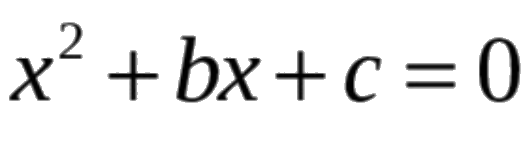

In [11]:
img_np = np.array(img)
img_np[img_np > 196] = 255
# img_np[img_np < 106] = 0
Image.fromarray(img_np)

In [12]:
from torchvision.transforms import Normalize, ToTensor, Compose

trans = Compose([ToTensor()])
ten = trans(Image.fromarray(img_np))
ten

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])

In [1]:
from src.utils.inference import ModelManager

manager = ModelManager('params/params_0.53', 'data/latex_vocab.txt', 150)

\int_{-=}^{{dle}^^^^^^^{{{{}}}{{{{llllllllllllllllllllllllllll{{{{{\delta\delta\delta\delta\delta\delta\delta\delta\delta\delta\delta\delta


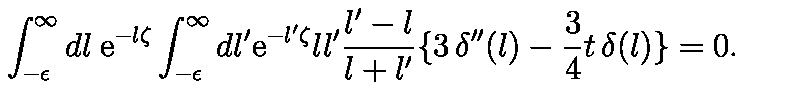

In [28]:
from PIL import Image

print(manager.predict('data/images_processed/5abbb9b19f.png'))
Image.open('data/images_processed/5abbb9b19f.png')

In [23]:
from src.utils.inference import process_img, load_vocab
from torchvision.transforms import ToTensor

img = process_img('data/images_processed/33978e1330.png', ToTensor())
v, _ = load_vocab('data/latex_vocab.txt')
m = AttentionOCR(len(v))
m.encoder.cnn(img).shape, img.shape

(torch.Size([128, 10, 90]), torch.Size([1, 1, 80, 720]))

In [31]:
from torchvision.models import resnet18

m = resnet18(True)


[]